# DL Pac 3B

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


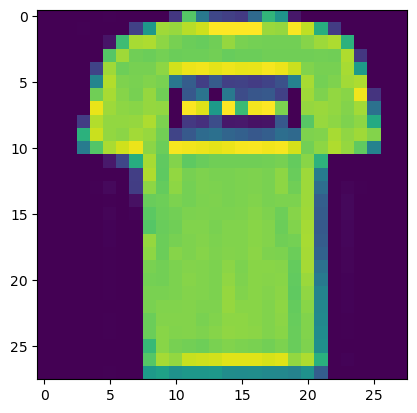

In [3]:
plt.imshow(x_train[1])

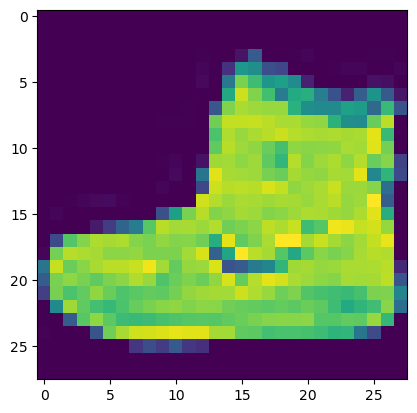

In [4]:
plt.imshow(x_train[0])

In [6]:
# Next, we will preprocess the data by scaling the pixel values to be between 0 and 1, and thenreshaping the images to be 28x28 pixels.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    # It shows a 13 * 13 size image with 32 channels or filters or depth.
    keras.layers.Dropout(0.25),
    # Reduce Overfitting of Training sample drop out 25% Neuron
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # 64 * 3 * 3 = 576 + 1 = 577 * 32 + 32(bias) = 18496
    keras.layers.MaxPooling2D((2, 2)),
    # It shows a 5 * 5 size image with 64 channels or filters or depth.
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # We need to flatten the 3x3x128 feature map to a vector of size 1152
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [16]:
# Compile and Train the Model
# After defining the model, we will compile it and train it on the training data.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


1875/1875 [==============================] - 30s 15ms/step - loss: 0.5616 - accuracy: 0.7930 - val_loss: 0.3749 - val_accuracy: 0.8596
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3600 - accuracy: 0.8690 - val_loss: 0.3149 - val_accuracy: 0.8881
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3169 - accuracy: 0.8839 - val_loss: 0.3095 - val_accuracy: 0.8835
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2919 - accuracy: 0.8926 - val_loss: 0.2731 - val_accuracy: 0.8963
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2754 - accuracy: 0.8979 - val_loss: 0.3178 - val_accuracy: 0.8831
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2608 - accuracy: 0.9028 - val_loss: 0.2510 - val_accuracy: 0.9121
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2499 - accuracy: 0.9068 - val_loss: 0.281

In [17]:
print('Test accuracy:', test_acc)

NameError: name 'test_acc' is not defined